Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, chi2_contingency, ttest_ind, mannwhitneyu

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('notebook', rc={'figure.figsize':(12, 7)})
plt.style.use('fivethirtyeight')

# Предобработка данных

In [2]:
aircrafts = pd.read_csv('~/datasets/query_1.csv')
flights  = pd.read_csv('~/datasets/query_3.csv')
festivals = pd.read_csv('~/datasets/query_last.csv')
combine = aircrafts, flights, festivals

In [3]:
print('Data Sample')
# данный цикл выводит на экран случайные отрывки из dataframe
# df.sample()
for data in combine:
    # display
    display(data.sample(3))

print('Missing Values info')
# данный цикл выводит таблицу с информацией
# о пропущенных значениях в dataframe
# df.isna()
for data in combine:
    missing_values = data.isna().sum().sort_values(ascending=False)
    missing_percent = (data.isna().sum() \
                       .sort_values(ascending=False) / len(data))
    # display
    display(pd.concat([missing_values, missing_percent], \
                     keys=['Values', 'Percent'], axis=1))

print('Data info')
# df.info()
for data in combine:
    display(data.info())

print('Data describe')
# df.describe()
for data in combine:
    display(data.describe())

Data Sample


,model,flights_amount
0,Airbus A319-100,607
4,Boeing 777-300,300
1,Airbus A321-200,960


,city,average_flights
5,Барнаул,2.612903
62,Пенза,4.000000
50,Нижневартовск,3.129032


,week_number,ticket_amount,festival_week,festival_name
9,39,51623,NaN,NaN
4,34,51492,NaN,NaN
2,32,51675,NaN,NaN


Missing Values info


,Values,Percent
flights_amount,0,0.0
model,0,0.0


,Values,Percent
average_flights,0,0.0
city,0,0.0


,Values,Percent
festival_name,7,0.7
festival_week,7,0.7
ticket_amount,0,0.0
week_number,0,0.0


Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_number    10 non-null     int64  
 1   ticket_amount  10 non-null     int64  
 2   festival_week  3 non-null      float64
 3   festival_name  3 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


None

Data describe


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


,week_number,ticket_amount,festival_week
count,10.00000,10.000000,3.000000
mean,34.50000,50670.400000,32.333333
std,3.02765,2502.752716,3.214550
min,30.00000,43568.000000,30.000000
25%,32.25000,51364.500000,30.500000
50%,34.50000,51439.000000,31.000000
75%,36.75000,51596.750000,33.500000
max,39.00000,51675.000000,36.000000


Типы данных в таблицах корректны. Общее количество данных - небольшое, для анализа хватит! В таблице с информацией о фестивалях (festivals) имеются пропущенные значения - это не критично т.к. в данном случае пропущенное значение означает, что в тот период времени фестивалей не было.

In [4]:
festivals['festival_name'] = festivals['festival_name'].fillna('нет')
festivals['festival_week'] = festivals['festival_week'].fillna(-1)

# 1. Графический анализ

In [5]:
# переоформил визуализацию в функцию
# слишком много было CTRL+C/CTRL+V кода
def take_pic(data, legend_labels, title, y, x, ylabel='sum'):
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))

    silent_labels = [' '] * len(data.values)
    
    cmap = sns.color_palette('husl', len(data.values))
    
    data.plot.pie(shadow=True, autopct='%1.1f%%', \
                  labels=silent_labels, ax=ax[0], colors=cmap, subplots=True)
    ax[0].legend(loc=2, labels=legend_labels)
    ax[0].set_title(title, fontsize=24)
    ax[0].set_ylabel(ylabel)
    
    sns.barplot(y=y, x=x, data=data, estimator=sum, orient='h', ax=ax[1], palette=cmap)
    ax[1].set_ylabel(' ')
    ax[1].set_xlabel(' ')
    
    plt.show()

### Топ 10 городов

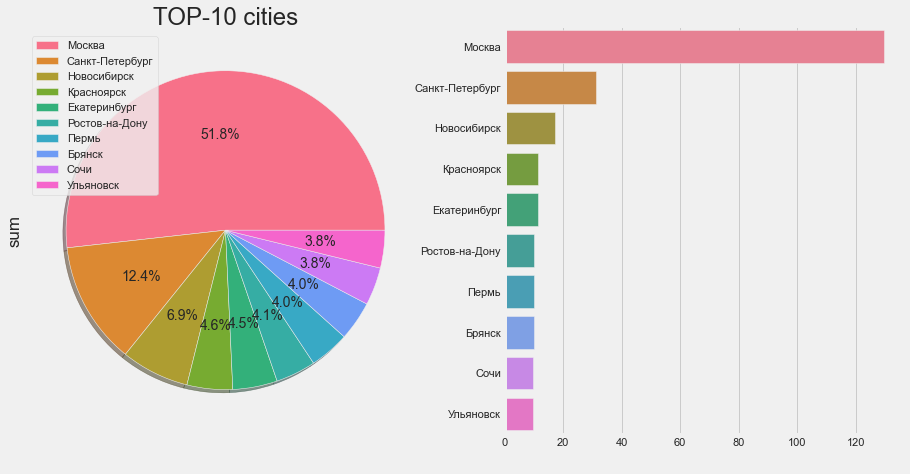

In [6]:
# df.pivot_table()
# df.head()
top_10_cities = (flights
                 .pivot_table(index='city', values='average_flights', aggfunc='sum')
                 .sort_values('average_flights', ascending=False)
                 .head(10)
)

take_pic(data=top_10_cities, legend_labels=top_10_cities.index, \
         title='TOP-10 cities', y=top_10_cities.index, x='average_flights')

ТОП-10 городов, где происходит посадка воздушного судна возглавляет столица России - Москва. Более 120 посадок в день совершают различные авиакомпании в аэропорты столицы.

### Случайная выборка 10 городов

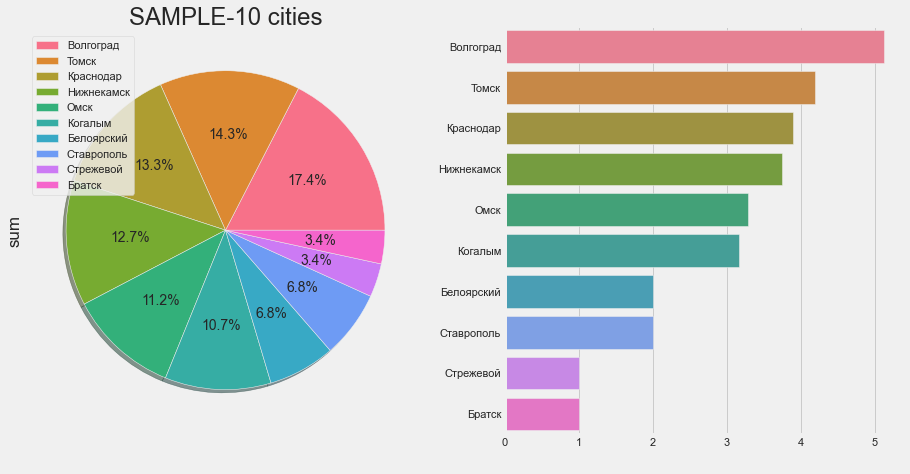

In [7]:
# df.pivot_table()
# df.sample()
sample_10_cities = (flights
                 .pivot_table(index='city', values='average_flights', aggfunc='sum')
                 .sample(10)
                 .sort_values('average_flights', ascending=False)
)

take_pic(data=sample_10_cities, legend_labels=sample_10_cities.index, \
         title='SAMPLE-10 cities', y=sample_10_cities.index, x='average_flights')

Случайная выборка позволяет нам сранивать разные города по количеству посадок в городском аэропорту.

### Топ 10 городов снизу

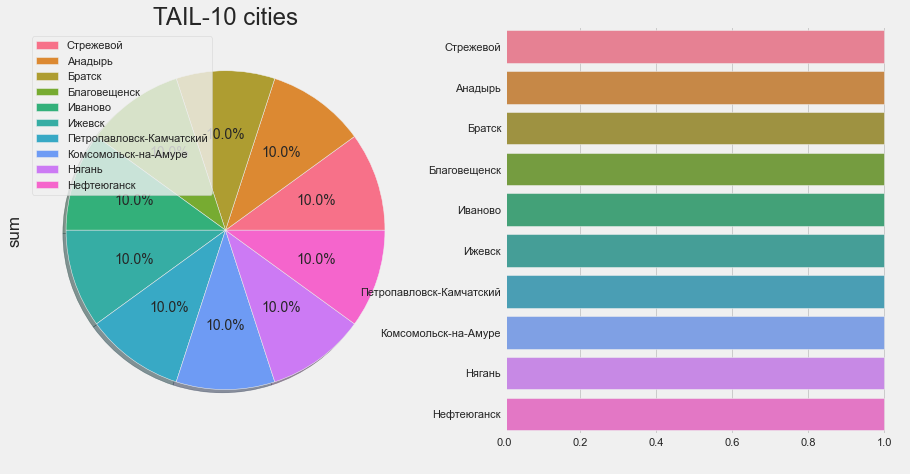

In [8]:
# df.pivot_table()
# df.tail()
tail_10_cities = (flights
                 .pivot_table(index='city', values='average_flights', aggfunc='sum')
                 .sort_values('average_flights', ascending=False)
                 .tail(10)
)

take_pic(data=tail_10_cities, legend_labels=tail_10_cities.index, \
         title='TAIL-10 cities', y=tail_10_cities.index, x='average_flights')

Города, не славящиеся популярностью среди условных "туристов"

### Топ моделей воздушных судов

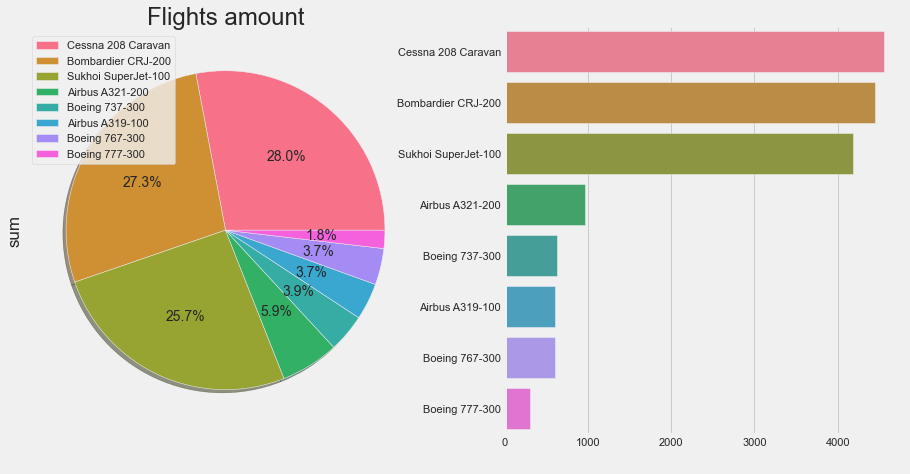

In [9]:
sorted_aircrafts = (aircrafts
                    .pivot_table(index='model', values='flights_amount', aggfunc='sum')
                    .sort_values('flights_amount', ascending=False)
)

take_pic(data=sorted_aircrafts, legend_labels=sorted_aircrafts.index, \
         title='Flights amount', y=sorted_aircrafts.index, x='flights_amount')

Две первых позиции занимают "частные" самолёты. Далее по списку - гражданская авиация для совершения пассажирских рейсов.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Понятный СУПЕРРРграфический и аналитический анализ) Выводы, действительно, очевидные. И тем приятнее видеть их подтврждение)))<br>

# 2. Проверка гипотезы

In [10]:
# f - festivals
modified_f = festivals.copy()
modified_f.loc[modified_f['festival_name'] != 'нет', 'festival'] = 'True'
modified_f.loc[modified_f['festival_name'] == 'нет', 'festival'] = 'False'
modified_f.loc[modified_f['festival'] != 'True', 'festival_n'] = 0
modified_f.loc[modified_f['festival'] == 'True', 'festival_n'] = 1

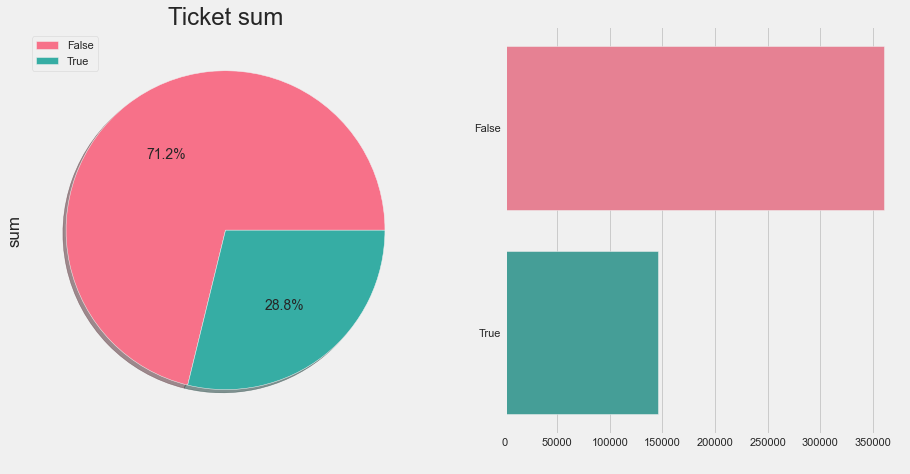

In [11]:
modified_f_pvt = modified_f.pivot_table(index='festival', \
                                        values='ticket_amount', \
                                        aggfunc='sum')

take_pic(data=modified_f_pvt, legend_labels=modified_f_pvt.index, \
         title='Ticket sum', y=modified_f_pvt.index, x='ticket_amount')

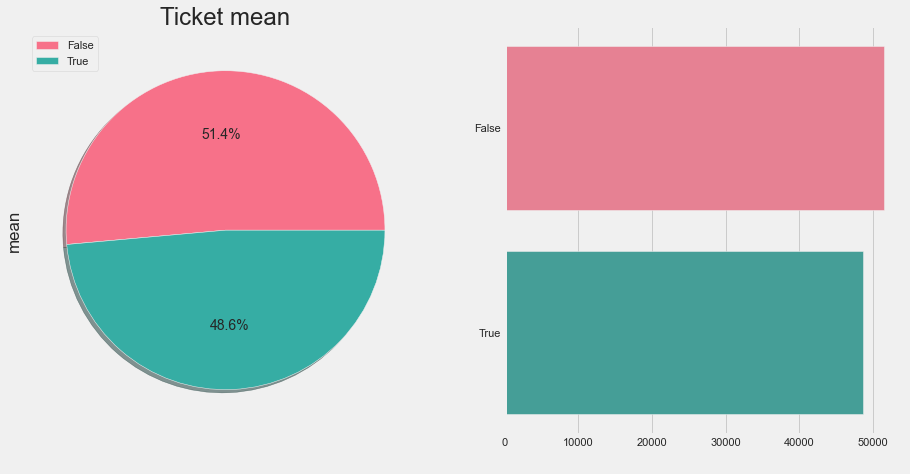

In [12]:
modified_f_pvt = modified_f.pivot_table(index='festival', \
                                        values='ticket_amount', \
                                        aggfunc='mean')

take_pic(data=modified_f_pvt, legend_labels=modified_f_pvt.index, \
         title='Ticket mean', y=modified_f_pvt.index, x='ticket_amount', ylabel='mean')

На первой визуализации (#2. Проверка гипотезы) можно видеть явные разлчия в количестве приобретённых билетов. Посмотрев на вторую визуализацию (#2. Проверка гипотезы), где изображены средние значение для двух категорий (фестиваль проводится: True; фестиваль не проводится: False) разницы в средних значениях можно сказать - нет.

In [13]:
f_yes = modified_f.query('festival_n == 1')['ticket_amount']
f_no = modified_f.query('festival_n == 0')['ticket_amount']

# Тест Шапиро-Уилка

Сформирует $H₀$ гипотезу, условие которой будет: 

*случайная величина $x$ распределена нормально*

Если значение $W$ будет $W≤W{α}$, то будет принята альтернативная гипотеза $H₁$

Исходя из результатов этого теста будет выбран критерий для проверки гипотезы:

*«Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».*

В обоих случаях значение $α$ будет равно 0.01 т.к. есть большая вероятнасть допустить ошибку 1-го рода ложно отвергнув верную гипотезу.

In [14]:
stat, pvalue = shapiro(modified_f['ticket_amount'])

alpha = 0.01

print('Статистика {}, pvalue {}'.format(stat, pvalue))

if pvalue > alpha:
    print('Данные распределены равномерно (H₀)')
else:
    print('Данные распределены не равномерно (H₁)')

Статистика 0.43256276845932007, pvalue 5.94398329667456e-07
Данные распределены не равномерно (H₁)


# Критерий Манна-Уитни

Мы отвергли нашу $H₀$ гипотезу и приняли альтернативную $H₁$ в тесте Шапиро-Уилка. Критерий Манна-Уитни позволяет работать с данными в которых распределение случайной величины - неравномерно.

In [15]:
stat, pvalue = mannwhitneyu(f_yes, f_no)

alpha = 0.01

print('Статистика {}, pvalue {}'.format(stat, pvalue))

if pvalue > alpha:
    print('Средние выборок равны (H₀)')
else:
    print('Средние выборок различаются (H₁)')

Статистика 2.0, pvalue 0.03412374418900064
Средние выборок равны (H₀)


Как было видно на второй визуализации (#2. Проверка гипотезы) разницы в средних значениях спроса на покупку билетов - нет. Сформированая нами гипотеза:

*«Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».*

принята